In [1]:
from IPython.display import HTML

HTML('''<script>
$(document).ready(function() {
  
  all_cells = $('div.cell.border-box-sizing.code_cell.rendered')
  
  $.each(all_cells, function(idx, val){
      if ($(val).find('div.output_wrapper').length === 0){
        $(val).hide();
      }
    });
  });
  
</script>
''')

# <center>Exploring Music Through Logistic Regression</center>

## Objective

The objective of this project is to expand my music selection through the use of logistic regression. Typically I like to explore music similar to what I listen to but I want to see if I can use machine learning to create a playlist of songs outside the sphere of my normal listening with the potential of me still enjoying the songs.

**Metrics for Success:** Although accuracy is important for the model, I will determine the success of this project based on two things, music exposure and likability. For exposure, I ideally want to have a playlist entirely of artists new to me in genres which I would not normally listen to. Ideal likability of the playlist would be at least 50% since my intention is to compose the playlist of songs I may or may not like.

The difficult part will be in categorizing songs between: Liked, Might Like, and Don't Like since I can tell what songs I like but songs I dislike is not as clear. In order for me to categorize music, I will have to do some data exploration and define these categories.



### About The Data

The data I am using consists of two separate CSV files. The first file I created from accessing the Spotify API and gathering my top 50 tracks from the past 6 months, documentation on this API endpoint can be read [here](https://developer.spotify.com/documentation/web-api/reference/personalization/get-users-top-artists-and-tracks/). The second file comes from a [Kaggle dataset](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) a user uploaded which contains about 233,000 tracks.

## Exploratory Data Analysis

Begin by importing all necessary modules and getting a look at the data.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

%matplotlib inline

In [3]:
df = pd.read_csv('top_features.csv',index_col=0)

In [4]:
df2 = pd.read_csv('SpotifyFeatures.csv')

In [5]:
df.head()

,artist,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,The Stylistics,You Make Me Feel Brand New,0.451,0.359,7,-8.567,1,0.0247,0.84700,0.000030,0.1370,0.178,76.015,audio_features,00CCi9yHJh7NjXcNT565Ja,spotify:track:00CCi9yHJh7NjXcNT565Ja,https://api.spotify.com/v1/tracks/00CCi9yHJh7N...,https://api.spotify.com/v1/audio-analysis/00CC...,288440,4
1,Al Green,Let's Stay Together,0.756,0.397,7,-10.701,0,0.0522,0.57000,0.011500,0.0542,0.507,101.985,audio_features,63xdwScd1Ai1GigAwQxE8y,spotify:track:63xdwScd1Ai1GigAwQxE8y,https://api.spotify.com/v1/tracks/63xdwScd1Ai1...,https://api.spotify.com/v1/audio-analysis/63xd...,199396,4
2,The Delfonics,I Gave to You,0.517,0.372,5,-8.936,1,0.0326,0.77500,0.000466,0.1520,0.479,121.097,audio_features,7ni5SnrJnT1QwZe1rcPqhC,spotify:track:7ni5SnrJnT1QwZe1rcPqhC,https://api.spotify.com/v1/tracks/7ni5SnrJnT1Q...,https://api.spotify.com/v1/audio-analysis/7ni5...,354240,3
3,Khruangbin,Maria También,0.748,0.630,6,-7.318,0,0.0460,0.00261,0.859000,0.5320,0.846,103.597,audio_features,66MpvsWO5O7gy9LjXGFw6I,spotify:track:66MpvsWO5O7gy9LjXGFw6I,https://api.spotify.com/v1/tracks/66MpvsWO5O7g...,https://api.spotify.com/v1/audio-analysis/66Mp...,190999,4
4,The Isley Brothers,Voyage to Atlantis,0.555,0.369,11,-11.677,0,0.0267,0.10100,0.001530,0.1010,0.472,74.495,audio_features,7r1gEyIhacXnvLriLjmp3c,spotify:track:7r1gEyIhacXnvLriLjmp3c,https://api.spotify.com/v1/tracks/7r1gEyIhacXn...,https://api.spotify.com/v1/audio-analysis/7r1g...,272533,4


In [6]:
print('Data Types')
df.dtypes

Data Types


artist               object
name                 object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dtype: object

In [7]:
print('Null Values')
df.isnull().sum()

Null Values


artist              0
name                0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [8]:
#change key to string values for now
df['key'] = df['key'].replace({0:'C',1:'C#',2:'D',3:'D#',4:'E',
                   5:'F',6:'F#',7:'G',8:'G#',9:'A',
                   10:'A#',11:'B'})
df['mode'] = df['mode'].replace({0:'Minor',1:'Major'})

In [9]:
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.608100,0.482280,-10.61920,0.054476,0.349103,0.300275,0.224698,0.629740,111.928560,257191.020000,3.820000
std,0.142698,0.137448,3.55613,0.035916,0.302311,0.385895,0.186462,0.208503,26.317053,78188.585512,0.388088
min,0.309000,0.207000,-21.28500,0.024300,0.000323,0.000000,0.036100,0.166000,74.495000,156653.000000,3.000000
25%,0.492500,0.380750,-12.22625,0.030925,0.052675,0.000090,0.091925,0.495750,87.533750,199039.000000,4.000000
50%,0.616500,0.467500,-10.01050,0.040300,0.323000,0.006070,0.139500,0.607000,111.332500,237333.500000,4.000000
75%,0.705000,0.588500,-7.98525,0.061950,0.585750,0.805000,0.329000,0.794250,128.745750,288079.500000,4.000000
max,0.956000,0.792000,-5.41000,0.190000,0.883000,0.920000,0.777000,0.967000,191.468000,454253.000000,4.000000


Simply observing the descriptive statistics, the first category which caught my eye is instrumentalness due to the apparently large gap between the 50th and 75th percentile. 

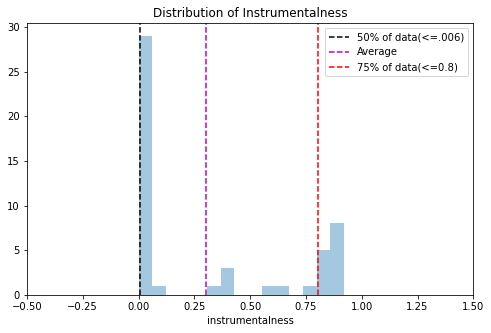

In [10]:
plt.figure(figsize=(8,5))
sns.distplot(df['instrumentalness'],kde=False,bins=15)
plt.axvline(df['instrumentalness'].quantile(),linestyle='dashed',color='k',label='50% of data(<=.006)')
plt.axvline(df['instrumentalness'].mean(),linestyle='dashed',color='m',label='Average')
plt.axvline(df['instrumentalness'].quantile(q=0.75),linestyle='dashed',color='r',label='75% of data(<=0.8)')
plt.xlim(-0.5,1.5)
plt.title('Distribution of Instrumentalness')
plt.legend()

By visualizing the distribution, it appears I largely favor songs which are on the low end in instrumentalness. This will be helpful in defining songs that I like.

Text(0.5, 1.0, 'Distribution of Speechiness')

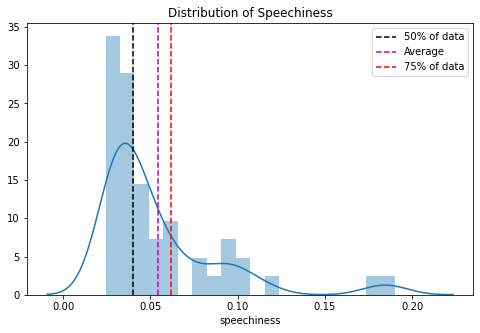

In [11]:
plt.figure(figsize=(8,5))
sns.distplot(df['speechiness'],bins=20)
plt.axvline(df['speechiness'].quantile(),linestyle='dashed',color='k',label='50% of data')
plt.axvline(df['speechiness'].mean(),linestyle='dashed',color='m',label='Average')
plt.axvline(df['speechiness'].quantile(q=0.75),linestyle='dashed',color='r',label='75% of data')
plt.legend()
plt.title('Distribution of Speechiness')

This distribution actually doesn't give too much insight since Spotify documentation defines "values below 0.33 most likely represent music and other non-speech-like tracks" and since the entire distribution is below this value, I will use this measurement to help define songs I will like.

Text(0.5, 1.0, 'Distribution of Danceability')

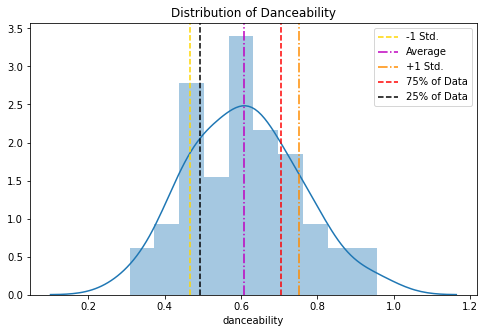

In [12]:
plt.figure(figsize=(8,5))
d_std = df['danceability'].std()
sns.distplot(df['danceability'],bins=10)
plt.axvline(df['danceability'].mean()-d_std,linestyle='dashed',color='#FFD700',label='-1 Std.')
plt.axvline(df['danceability'].mean(),linestyle='dashdot',color='m',label='Average')
plt.axvline(df['danceability'].mean()+d_std,linestyle='dashdot',color='#FF8C00',label='+1 Std.')
plt.axvline(df['danceability'].quantile(q=0.75),linestyle='dashed',label='75% of Data',color='r')
plt.axvline(df['danceability'].quantile(q=0.25),linestyle='dashed',label='25% of Data',color='k')
plt.legend()
plt.title('Distribution of Danceability')

Spotify documentation defines danceability as a measurement of how suitable a track is for dancing with 0.0 being least danceable and 1.0 being most danceable. This measurement is based on various features such as: tempo, regularity, rhythm stability, and beat strength however it is not clear how each of these affects the final calculation for danceability. 

It appears my personal preference for danceability follows a relatively normal distribution so I think standard deviations will be especially useful in defining songs I like, might like, and don't like.

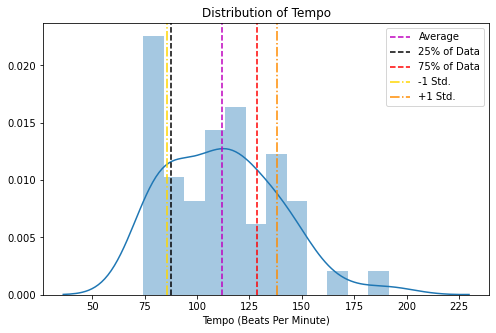

In [13]:
t_std = df['tempo'].std()
plt.figure(figsize=(8,5))
sns.distplot(df['tempo'],bins=12)
plt.axvline(df['tempo'].mean(),linestyle='dashed',color='m',label='Average')
plt.axvline(df['tempo'].quantile(q=0.25),linestyle='dashed',label='25% of Data',color='k')
plt.axvline(df['tempo'].quantile(q=0.75),linestyle='dashed',label='75% of Data',color='r')
plt.axvline(df['tempo'].mean()-t_std,linestyle='dashdot',label='-1 Std.',color='#FFD700')
plt.axvline(df['tempo'].mean()+t_std,linestyle='dashdot',label='+1 Std.',color='#FF8C00')
plt.title('Distribution of Tempo')
plt.xlabel('Tempo (Beats Per Minute)')
plt.legend()

The histogram and quantile lines show that I favor songs on the lower end of the tempo range with 75% of the songs being between 75 BPM and just above 125 BPM.

From the visualization, I think the percentile values will be good measurements for defining songs I like. 

One other interesting observation I noted is despite tempo being one of the factors in danceability, the distributions are different. It's possible this indicates tempo actually plays a small role in the calculation of danceability. 

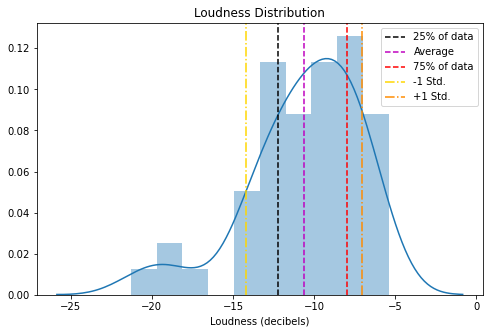

In [14]:
l_std = df['loudness'].std()
plt.figure(figsize=(8,5))
sns.distplot(df['loudness'],bins=10)
plt.axvline(df['loudness'].quantile(q=0.25),linestyle='dashed',color='k',label='25% of data')
plt.axvline(df['loudness'].mean(),linestyle='dashed',color='m',label='Average')
plt.axvline(df['loudness'].quantile(q=0.75),linestyle='dashed',color='r',label='75% of data')
plt.axvline(df['loudness'].mean()-l_std,linestyle='dashdot',label='-1 Std.',color='#FFD700')
plt.axvline(df['loudness'].mean()+l_std,linestyle='dashdot',label='+1 Std.',color='#FF8C00')
plt.title('Loudness Distribution')
plt.xlabel('Loudness (decibels)')
plt.legend()

The distribution for loudness is negatively skewed so I think the first and third quantile values will be most useful in accurately defining my preferences. 

According to Spotify, values for loudness typically range between the -60 to 0 decibels so my preference for loudness is on the higher range.

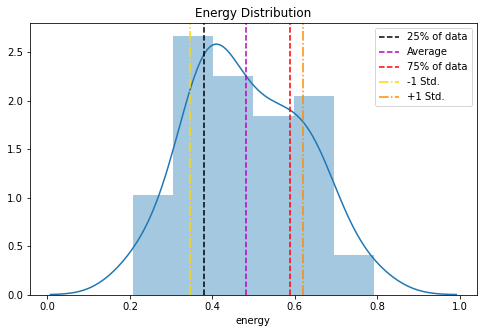

In [15]:
e_std = df['energy'].std()
plt.figure(figsize=(8,5))
sns.distplot(df['energy'])
plt.axvline(df['energy'].quantile(q=0.25),linestyle='dashed',color='k',label='25% of data')
plt.axvline(df['energy'].mean(),linestyle='dashed',color='m',label='Average')
plt.axvline(df['energy'].quantile(q=0.75),linestyle='dashed',color='r',label='75% of data')
plt.axvline(df['energy'].mean()-e_std,linestyle='dashdot',label='-1 Std.',color='#FFD700')
plt.axvline(df['energy'].mean()+e_std,linestyle='dashdot',label='+1 Std.',color='#FF8C00')
plt.title('Energy Distribution')
plt.legend()

Spotify defines energy as a "measure of intensity and activity", with typical energetic tracks being fast, loud, and noisy. 

As seen from the positively skewed distribution, I tend to prefer songs which are on the lower end of the energy spectrum with 75% of these songs being less than 0.6 on a scale from 0.0 to 1.0.

Despite my preference for loudness being in the higher range, it makes sense that I have a tendency for lower energy songs since energy also accounts for how fast a song is and from the Tempo Distribution it was seen I prefer slower songs.

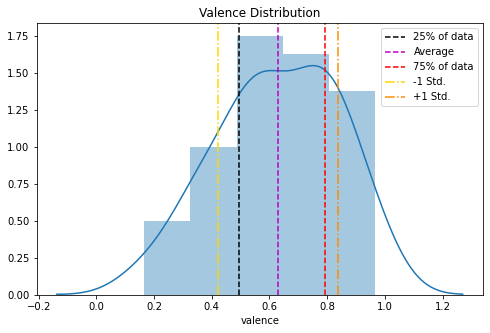

In [16]:
v_std = df['valence'].std()
plt.figure(figsize=(8,5))
sns.distplot(df['valence'])
plt.axvline(df['valence'].quantile(q=0.25),linestyle='dashed',color='k',label='25% of data')
plt.axvline(df['valence'].mean(),linestyle='dashed',color='m',label='Average')
plt.axvline(df['valence'].quantile(q=0.75),linestyle='dashed',color='r',label='75% of data')
plt.axvline(df['valence'].mean()-v_std,linestyle='dashdot',label='-1 Std.',color='#FFD700')
plt.axvline(df['valence'].mean()+v_std,linestyle='dashdot',label='+1 Std.',color='#FF8C00')
plt.title('Valence Distribution')
plt.legend()

Valence is described as a measurement of how positive a song sounds ranging from 0.0 to 1.0, where values closer to 0 represent songs which convey sadness and values closer to 1 represent songs which sound more cheerful. However, Spotify documentation does not give any more details on the actual calculation of this metric.

For my personal preference it looks like I prefer songs which convey more positivity with 75% of the songs being greater than 0.5 and a mean value a little greater than 0.6.



In [17]:
#minutes:seconds might be easier to interpret than milliseconds
def from_milliseconds(milliseconds):
    seconds, milliseconds = divmod(milliseconds,1000)
    minutes, seconds = divmod(seconds,60)
    time = f'{minutes}:{seconds:02d}'
    return time
timelist = [from_milliseconds(duration) for duration in df['duration_ms']]

In [18]:
duration = pd.DataFrame(df['duration_ms'])
duration['time'] = timelist
duration = duration.sort_values('time')
time_bins = pd.cut(duration['duration_ms'],
                   bins=[120000,179999,239999,299999,359999,419999,479999],
                   labels=['2:00-2:59','3:00-3:59','4:00-4:59','5:00-5:59','6:00-6:59','7:00-7:59'])

In [19]:
big_duration = df2[df2['duration_ms']<1000000]['duration_ms']
big_timelist = [from_milliseconds(duration) for duration in big_duration]
big_big_time = pd.DataFrame(big_duration)
big_big_time['time'] = big_timelist
big_big_time = big_big_time.sort_values('time')
big_time_bins = pd.cut(big_big_time['duration_ms'],
                   bins=[119999,179999,239999,299999,359999,419999,479999],
                   labels=['2:00-2:59','3:00-3:59','4:00-4:59','5:00-5:59','6:00-6:59','7:00-7:59'])

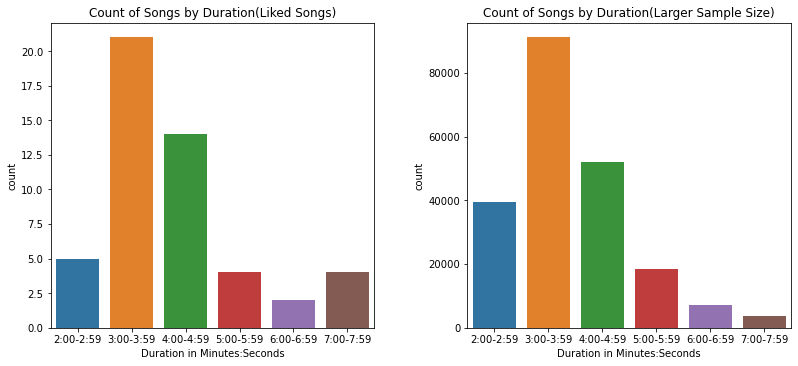

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(time_bins)
plt.xlabel('Duration in Minutes:Seconds')
plt.title('Count of Songs by Duration(Liked Songs)')
plt.subplot(122)
sns.countplot(big_time_bins)
plt.title('Count of Songs by Duration(Larger Sample Size)')
plt.xlabel('Duration in Minutes:Seconds')
plt.tight_layout(pad=4)

Spotify gives duration in milliseconds however I decided to convert to minutes:seconds and group the songs for better interpretability. At first I noticed a large portion of songs between the 3-minute to 5-minute range but I was skeptical to attribute duration as a determinant for me liking a song.

To test this skepticism I observed the distribution of a much larger sample of songs and it is seen that in terms of duration, my liked songs are distributed similarly to the larger sample.

In addition to observing the different distributions, I conducted a Chi-Squared test with confidence interval of 95% and the Null hypothesis: 

**H<sub>0</sub> :** The two distributions are independent from another and I can attribute duration to me liking a song

and Alternative Hypothesis:

**H<sub>1</sub> :** The two distributions are not independent and the distribution of my liked songs follows the larger population 

In [21]:
liked_songs = time_bins.groupby(time_bins).count()
db_bins = big_time_bins.dropna()
database_songs = db_bins.groupby(db_bins).count()
compare_duration = pd.DataFrame([liked_songs,database_songs],index=['Liked Songs','Database Songs']).T
chi2_d, p_d, dof, expected = stat.chi2_contingency(compare_duration)
print(f'The Chi-Square Test Statistic is: {chi2_d:.02f}\nThe p-value is: {p_d:.04f}')

The Chi-Square Test Statistic is: 13.14
The p-value is: 0.0221


Since the p-value is less than .05, I can reject the null hypothesis and confidently ignore duration as a determinant of my liking of a song.

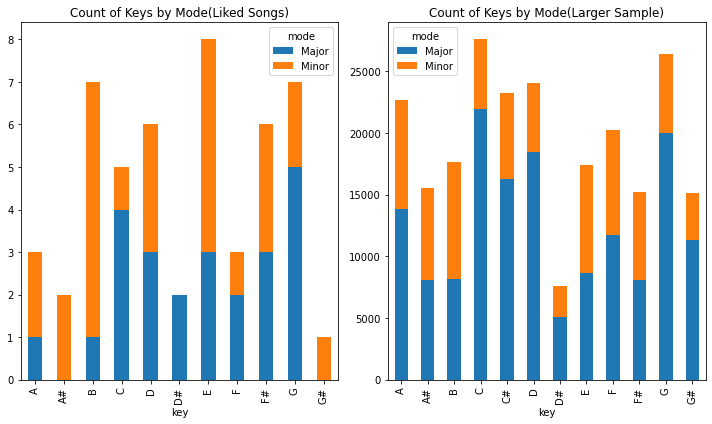

In [22]:
key_df = df[['key','mode']].groupby(['key','mode']).size().reset_index().pivot(columns='mode',index='key',values=0)
key_df2 = df2[['key','mode']].groupby(['key','mode']).size().reset_index().pivot(columns='mode',index='key',values=0)
fig, (ax,ax2) = plt.subplots(ncols=2,figsize=(10,6))
key_df.plot(kind='bar',stacked=True,title='Count of Keys by Mode(Liked Songs)',ax=ax)
key_df2.plot(kind='bar',stacked=True,title='Count of Keys by Mode(Larger Sample)',ax=ax2)
plt.tight_layout()

Performing a similar test for key and mode features:

In [23]:
db_key = df2['key'] 
liked_key = df['key'] 
db_mode = df2['mode'] 
liked_mode = df['mode'] 
db_key_count = db_key.groupby(db_key).count()
liked_key_count = liked_key.groupby(liked_key).count()
db_mode_count = db_mode.groupby(db_mode).count()
liked_mode_count = liked_mode.groupby(liked_mode).count()
compare_key = pd.DataFrame([liked_key_count,db_key_count],index=['Liked','Database']).T.fillna(value=0)
compare_mode = pd.DataFrame([liked_mode_count,db_mode_count],index=['Liked','Database']).T.fillna(value=0)

In [24]:
chi2_k,p_k,dof,expected = stat.chi2_contingency(compare_key)
chi2_m,p_m,dof,expected = stat.chi2_contingency(compare_mode)
print(f'The Chi-Square Test Statistic for Key is: {chi2_k:.02f}\nThe p-value for Key is: {p_k:.04f}\nThe Chi-Square Test Statistic for Mode is: {chi2_m:.02f}\nThe p-value for Mode is: {p_m:.04f} ')

The Chi-Square Test Statistic for Key is: 18.75
The p-value for Key is: 0.0658
The Chi-Square Test Statistic for Mode is: 5.78
The p-value for Mode is: 0.0162 


The p-value is greater than .05 for key and less than .05 for mode, so I will take into account my preference of key but not mode.

## Check for Collinearity

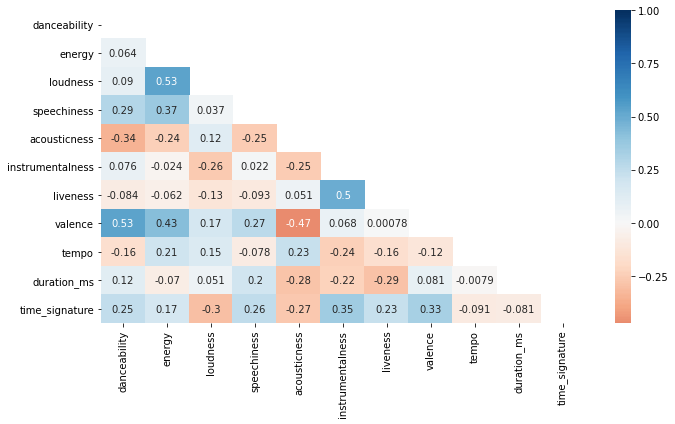

In [25]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(10,6))
sns.heatmap(corr,cmap='RdBu',center=0,annot=True,mask=mask)
plt.tight_layout()

Some of the higher correlations among the data are with valence so I will look into those relationships first.

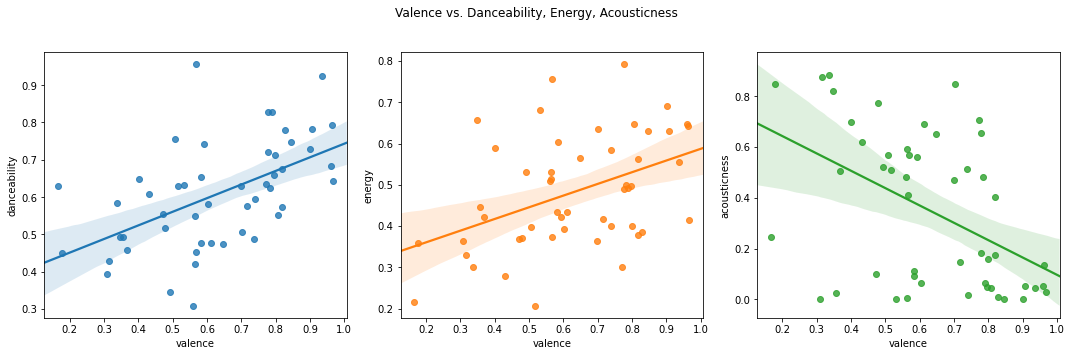

In [26]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(15,5))
sns.regplot(x=df['valence'],y=df['danceability'],ax=ax1)
sns.regplot(x=df['valence'],y=df['energy'],ax=ax2)
sns.regplot(x=df['valence'],y=df['acousticness'],ax=ax3)
plt.suptitle('Valence vs. Danceability, Energy, Acousticness')
plt.subplots_adjust(top=0.85)
plt.tight_layout(rect=[0,0,1,0.95])

Although the correlation coefficients show moderate correlation there is still a good amount of visible variability indicating these features to not have a linear relationship which would significantly affect the regression model

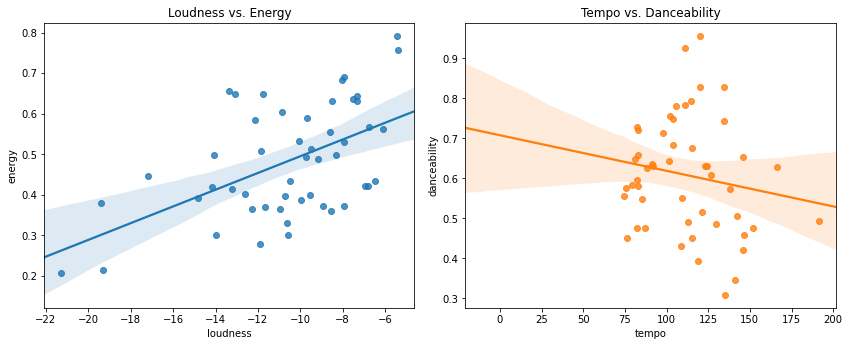

In [27]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.regplot(x=df['loudness'],y=df['energy'],ax=ax1)
ax1.set_title('Loudness vs. Energy')
sns.regplot(x=df['tempo'],y=df['danceability'],ax=ax2)
ax2.set_title('Tempo vs. Danceability')
plt.tight_layout(pad=1.4)

Looking at loudness versus energy, there is a linear realtionship but again the relationship is not strong enough to be considered collinear.

Another interesting observation is the tempo-danceability relationship seen which confirms my earlier suspicion of tempo's small role in danceability.

### Categorizing the Data

Now I will have to categorize the tracks based on what I found from the data.

**0** will represent a song I don't like, **1** will represent a song I might like, **2** will represent a song I like

The criteria for a song I like is as follows: 
- Instrumentalness less than 0.25
- Speechiness less than 0.33
- Danceability between 0.492 and .705
- Tempo between 87.5 and 128.75
- Loudness between -12.22 and -7.98
- Energy between 0.344 and 0.619
- Valence between 0.495 and 0.794

The criteria for a song I might like is as follows:
- Instrumentalness between 0.25 and .805
- Speechiness between 0.33 and 0.66
- Danceability between 0.35 and 0.492 **or** 0.705 and 0.847 
- Tempo between 74 and 87.5 **or** 128.75 and 138.25
- Loudness between -15.782 and -12.22 **or** -7.98 and -6.45
- Energy between 0.207 and 0.344 **or** .619 and .792
- Valence between 0.3 and 0.495 **or** 0.794 and 0.96

In [28]:
db_data = df2.rename(columns={'artist_name':'artist','track_name':'name','track_id':'id'})

In [29]:
liked_data = df.drop(columns=['track_href','analysis_url','type','uri'])

In [30]:
db_data = db_data.drop(columns=['popularity','genre'])

In [31]:
liked_data['liked'] = 2

In [32]:
test_tracks = db_data.sample(frac=0.25)
test_tracks.reset_index(drop=True,inplace=True)

In [33]:
test_tracks['liked'] = 0

In [34]:
for i in range(0,len(test_tracks)):
    current_track = test_tracks.iloc[i]
    if   (((current_track['danceability'] > 0.35 and current_track['danceability'] < .492) or (current_track['danceability'] > .705 and current_track['danceability'] < .8477)) and ((current_track['valence'] > 0.3 and current_track['valence'] < 0.495) or (current_track['valence'] > 0.794 and current_track['valence'] < 0.96))) or (current_track['instrumentalness'] > 0.25 and current_track['instrumentalness'] < 0.805) or (current_track['speechiness'] > 0.33 and current_track['speechiness'] <= 0.66) or (((current_track['energy'] > .207 and current_track['energy'] < .3447) or (current_track['energy'] > .61945 and current_track['energy'] < .792)) and ((current_track['loudness'] > -15.782 and current_track['loudness'] < -12.226) or (current_track['loudness'] > -7.985 and current_track['loudness'] < -6.454))) or ((current_track['tempo'] > 74 and current_track['tempo'] < 87.534) or (current_track['tempo'] > 128.746 and current_track['tempo'] < 138.245)):
         test_tracks.at[i,'liked'] = 1
    elif (current_track['instrumentalness'] <= 0.25) and (current_track['speechiness'] <= 0.33) and (current_track['danceability'] >= .492 and current_track['danceability'] <= .705) and (current_track['tempo'] >= 87.534 and current_track['tempo'] <= 128.746) and (current_track['loudness'] >= -12.226 and current_track['loudness'] <= -7.985) and (current_track['energy'] >= .3447 and current_track['energy'] <= .61945) and (current_track['valence'] >= 0.495 and current_track['valence'] <= 0.794):
         test_tracks.at[i,'liked'] = 2
    else:
        pass

In [35]:
test_data = test_tracks.append(liked_data).drop(columns=['acousticness','time_signature','duration_ms','liveness']).reset_index(drop=True)

In [36]:
y = test_data['liked']
X= test_data.drop(columns='liked')

In [37]:
ohe = OneHotEncoder(handle_unknown='ignore')
key_enc = pd.DataFrame(ohe.fit_transform(X[['key']]).toarray(),columns=['C','C#','D','D#','E','F','F#','G','G#','A','A#','B'])

In [38]:
mode_enc = pd.DataFrame(ohe.fit_transform(X[['mode']]).toarray(),columns=['Major','Minor'])

In [39]:
X = X.join([key_enc,mode_enc]).drop(columns=['key','mode','id','name','artist'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

### Modeling

After some preprocessing, the data was ready to be trained and tested.The initial logistic regression model gave really bad results, so I did some modification with training iterations and class weights to get the (temporary) final model.

In [41]:
logR = LogisticRegression(max_iter=20000,class_weight='balanced')
logR.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=20000)

In [42]:
y_pred = logR.predict(X_test)

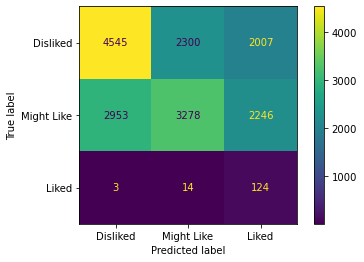

In [43]:
plot_confusion_matrix(logR,X_test,y_test,display_labels=['Disliked','Might Like','Liked'])

In [44]:
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
print(f'Precision for this model is: {precision:.04f}')
print(f'Recall for this model is: {recall:.04f}')

Precision for this model is: 0.5917
Recall for this model is: 0.4549


From the confusion matrix as well as the precision and recall scores, this model didn't perform too well. Looking at the matrix and low recall, the model gives a lot of false negatives especially with the `Might Like` class which is the main target for this project.

Still, I don't want to get too caught up on these metrics in comparison to the results of the actual playlist

In [45]:
#final = db_data.sample(frac=0.05).reset_index(drop=True)
#fkey = pd.DataFrame(ohe.fit_transform(final[['key']]).toarray(),columns=['C','C#','D','D#','E','F','F#','G','G#','A','A#','B'])
#fmode = pd.DataFrame(ohe.fit_transform(final[['mode']]).toarray(),columns=['Major','Minor'])
#track_meta = final[['artist','name','id']]
#final = final.join([fkey,fmode]).drop(columns=['key','mode','artist','name','id','time_signature','duration_ms','liveness','acousticness'])

In [46]:
#final_pred = logR.predict(final)

In [47]:
#predicted_df = final.join([track_meta,pd.Series(final_pred,name='liked')])
#predicted_tracklist = predicted_df[predicted_df.liked==1].sample(n=50)

In [48]:
#predicted_tracklist.id.to_json('track_ids.json')

### Listening to The Music

After training the model and using it to predict a separate dataset, I extracted 50 songs from the `Might Like` category and created a playlist through Spotify's API



<img src="https://i.gyazo.com/bf2053357177e5840563c6e92b1557b2.png" width="500" height="500">

Upon looking at the 50 tracks, there were 9 artists I already knew of and 1 track which I would consider in my active listening

Another interesting thing I noted is 6 of the tracks in the playlist are actually segments from stand-up specials which could indicate the criteria I set for speechiness was too high. 

After subtracting the 6 standup segments(which I did enjoy) and the 1 song which I considered in my active listening, the total number of tracks to evaluate went down to 43. Of the 43, I ended up liking 19 of the songs so just a little less than half. 

### Conclusion

I ended up falling short of the metrics I set, however I still discovered some good music outside of my normal listening.

Some of the causes to the performance not being as expected could be the small sample size used for defining the classes, better tuning for hyperparameters, and even the simple difficulty of classifying subjectivity.

In the future it could be worth exploring other classification algorithms such as such as decision tree or even digging into clustering for this use case.